In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

data_folder = '../../data' 

path = os.path.join(data_folder, 'tv_season_to_race_gender_count.csv')

In [ ]:

# Load the data
df = pd.read_csv(path)

# Remove 'Undetermined' columns if needed
df = df.filter(regex='^(?!.*_Undetermined).*$', axis=1)

# Drop columns that are not related to demographics (e.g., 'show_id', 'season_number')
demographics = df.drop(columns=['show_id', 'season_number'])

# Normalize the counts for each ethnic background by dividing by the count for each group
normalized_demographics = demographics.div(demographics.sum(axis=1), axis=0) * 100

# Now you can proceed as before, but use the normalized_demographics DataFrame
for demographic in normalized_demographics.columns:
    # Group by the demographic and compute the mean for all other demographics
    average_counts = normalized_demographics.groupby(df[demographic]).mean()

    # Visualize the data
    plt.figure(figsize=(15, 10))
    sns.heatmap(average_counts, cmap='coolwarm', annot=True)
    plt.title(f'Normalized Average Percentages by Ethnic Background for Varying Counts of {demographic}')
    plt.show()


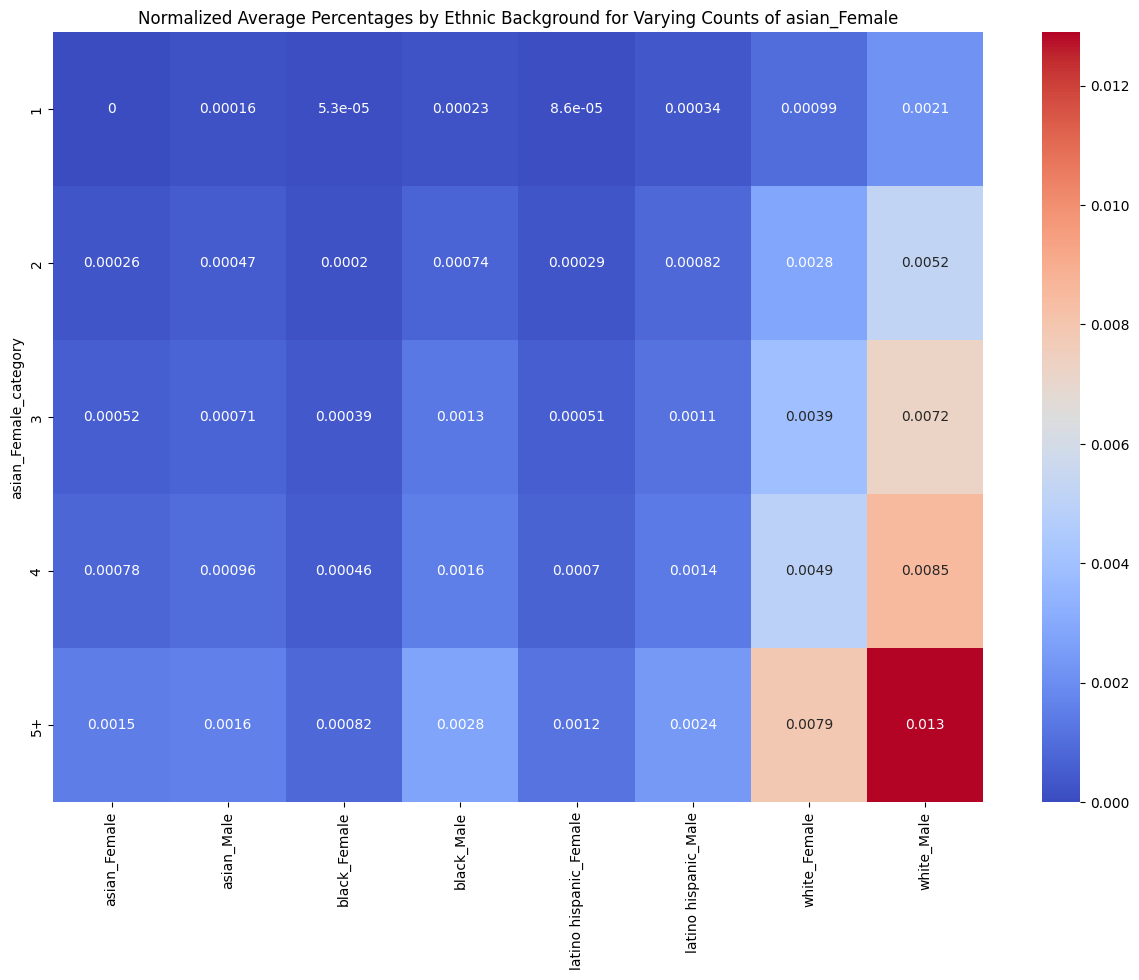

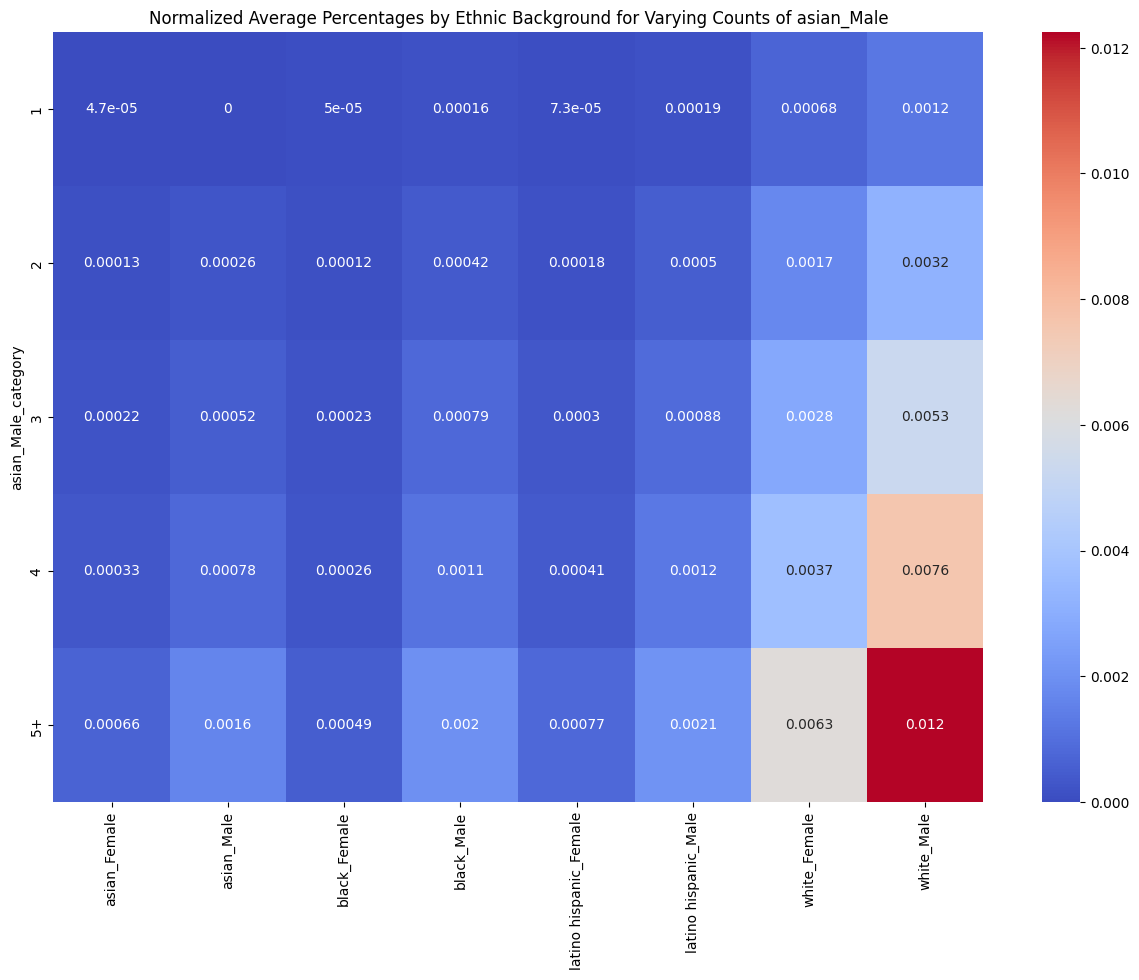

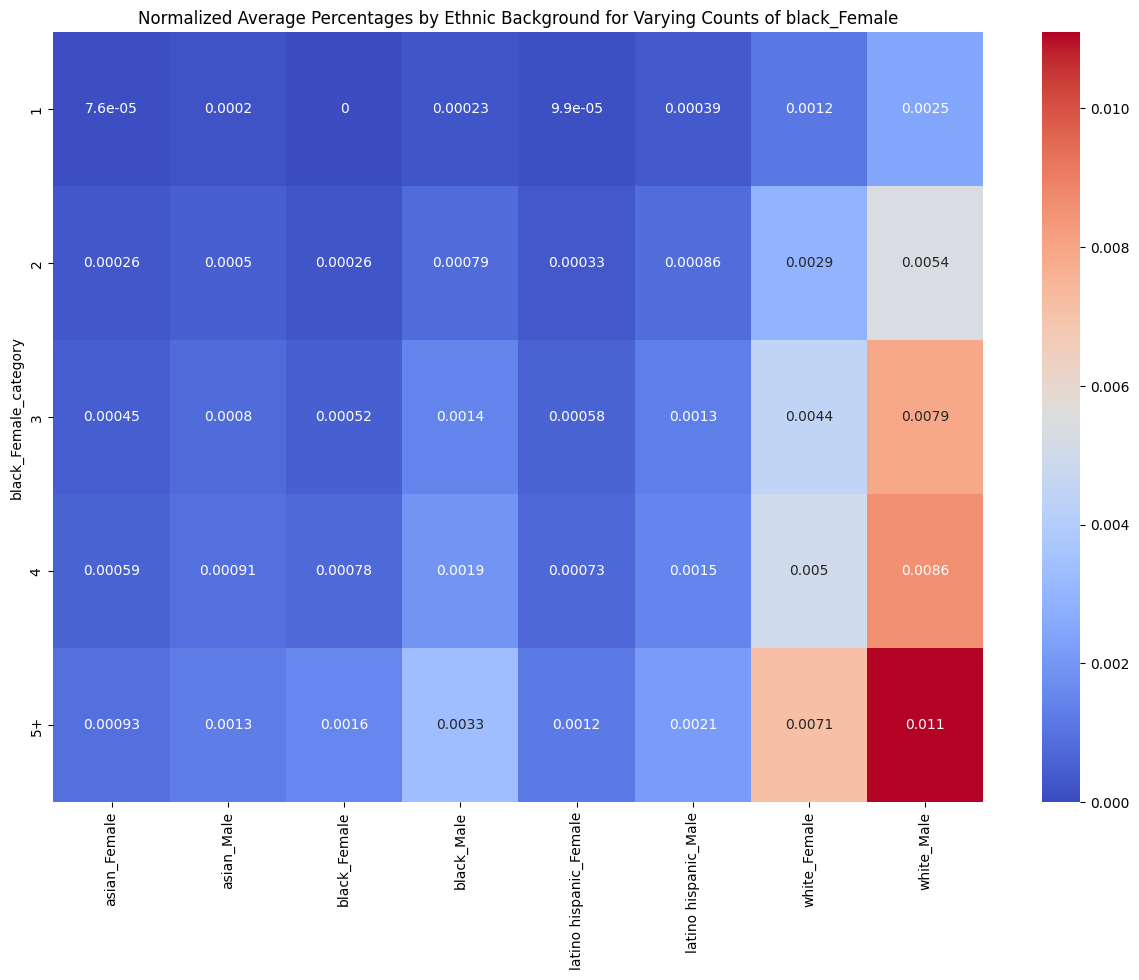

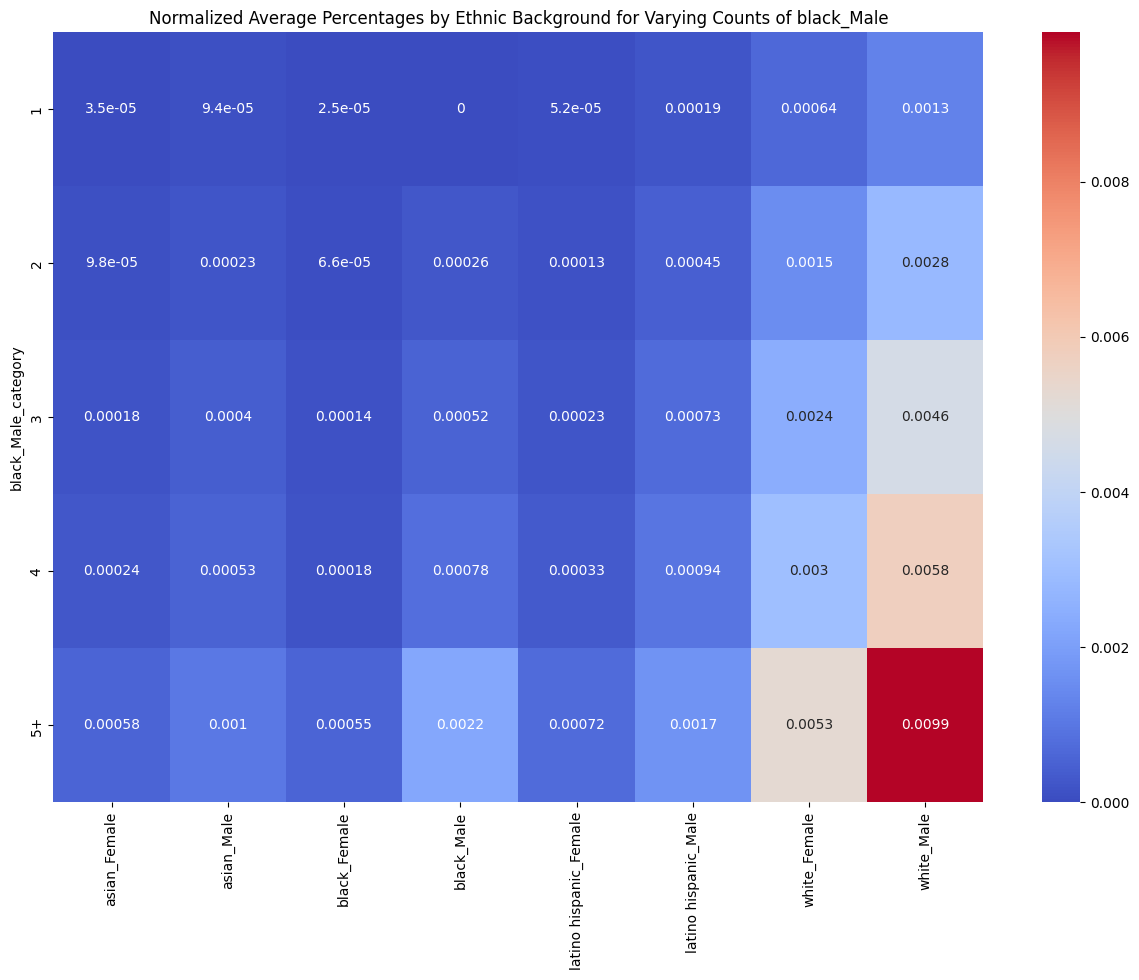

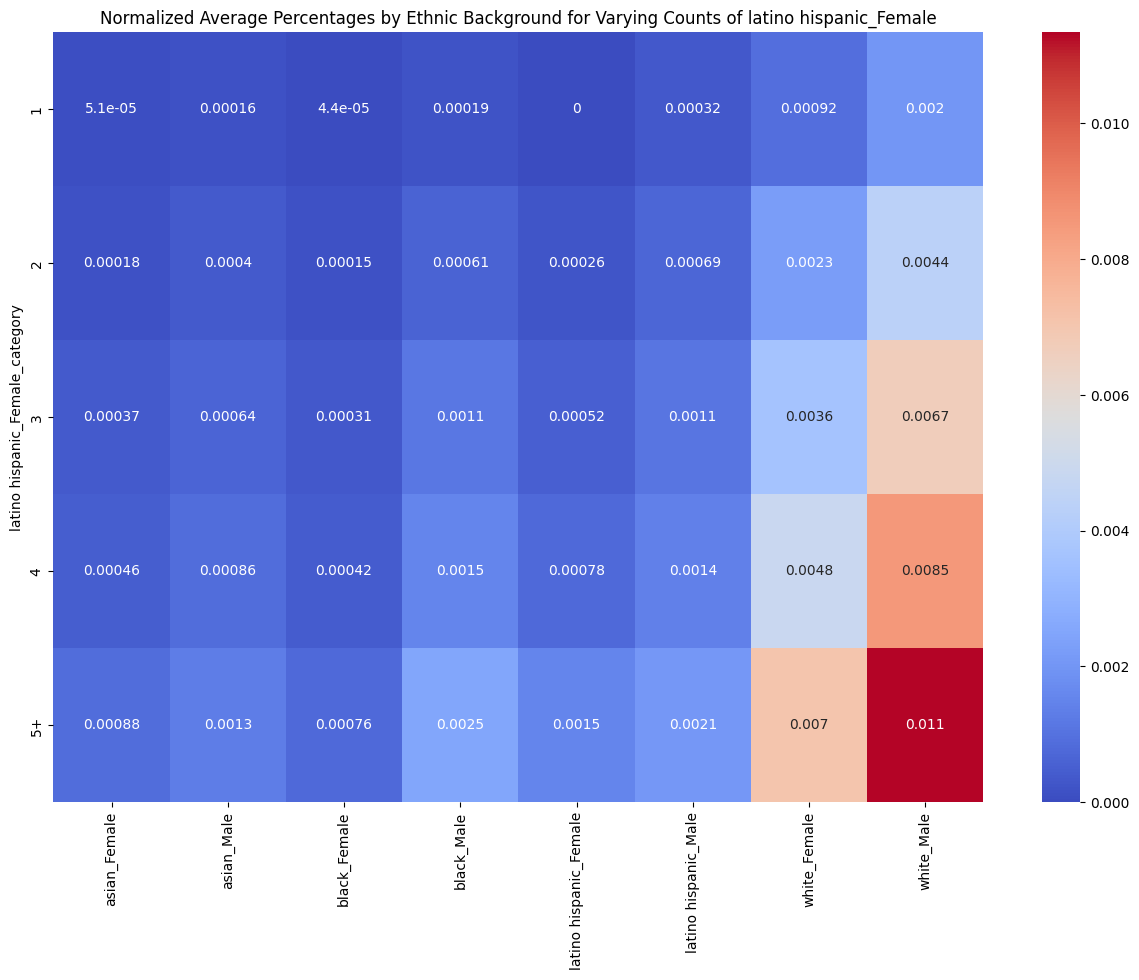

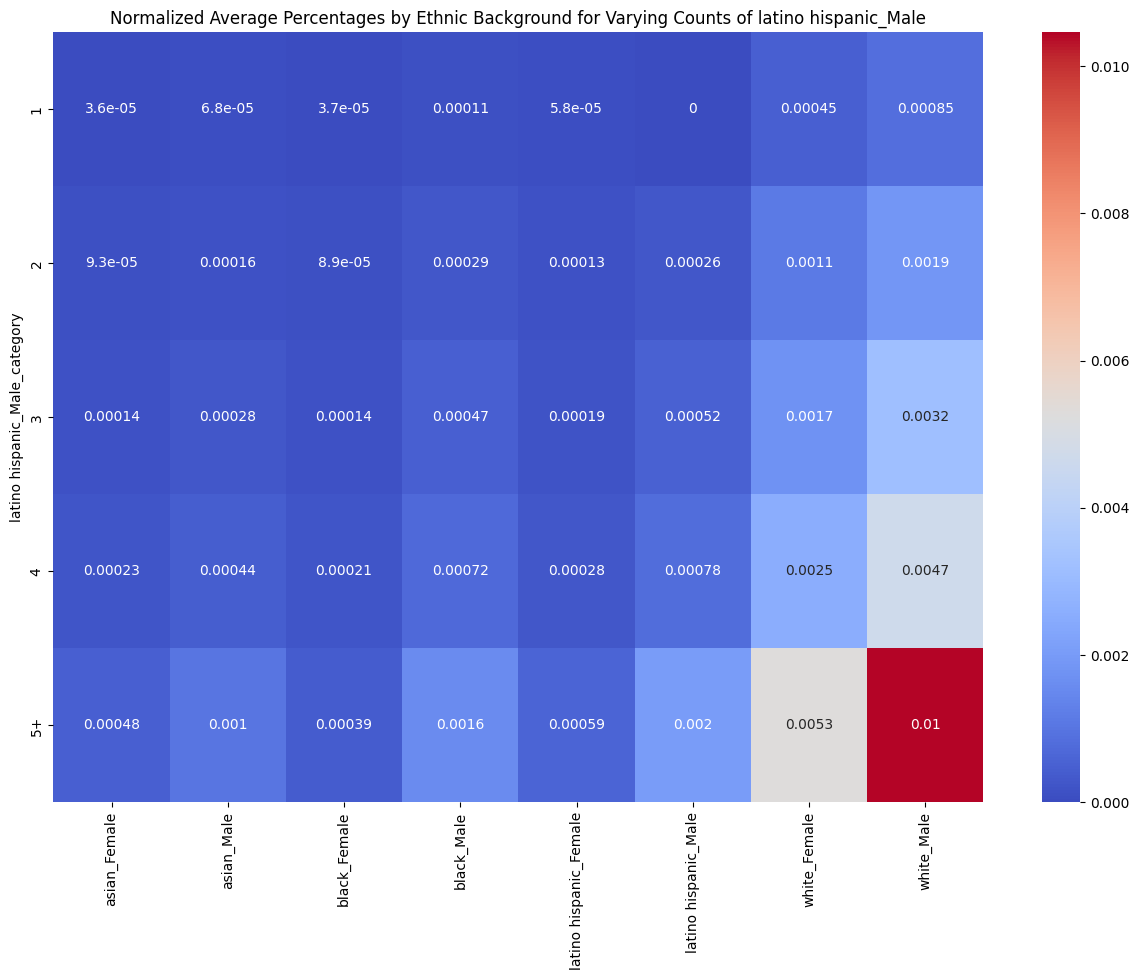

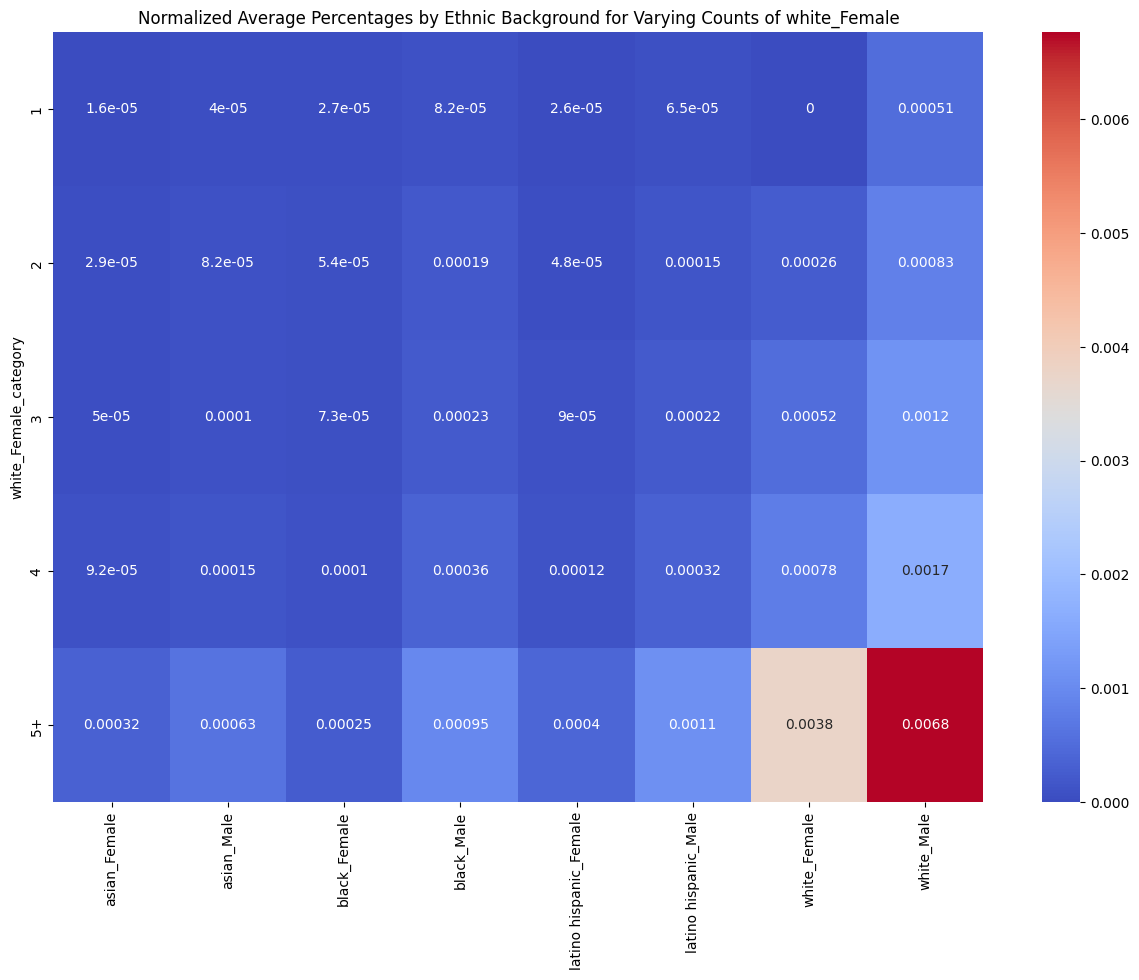

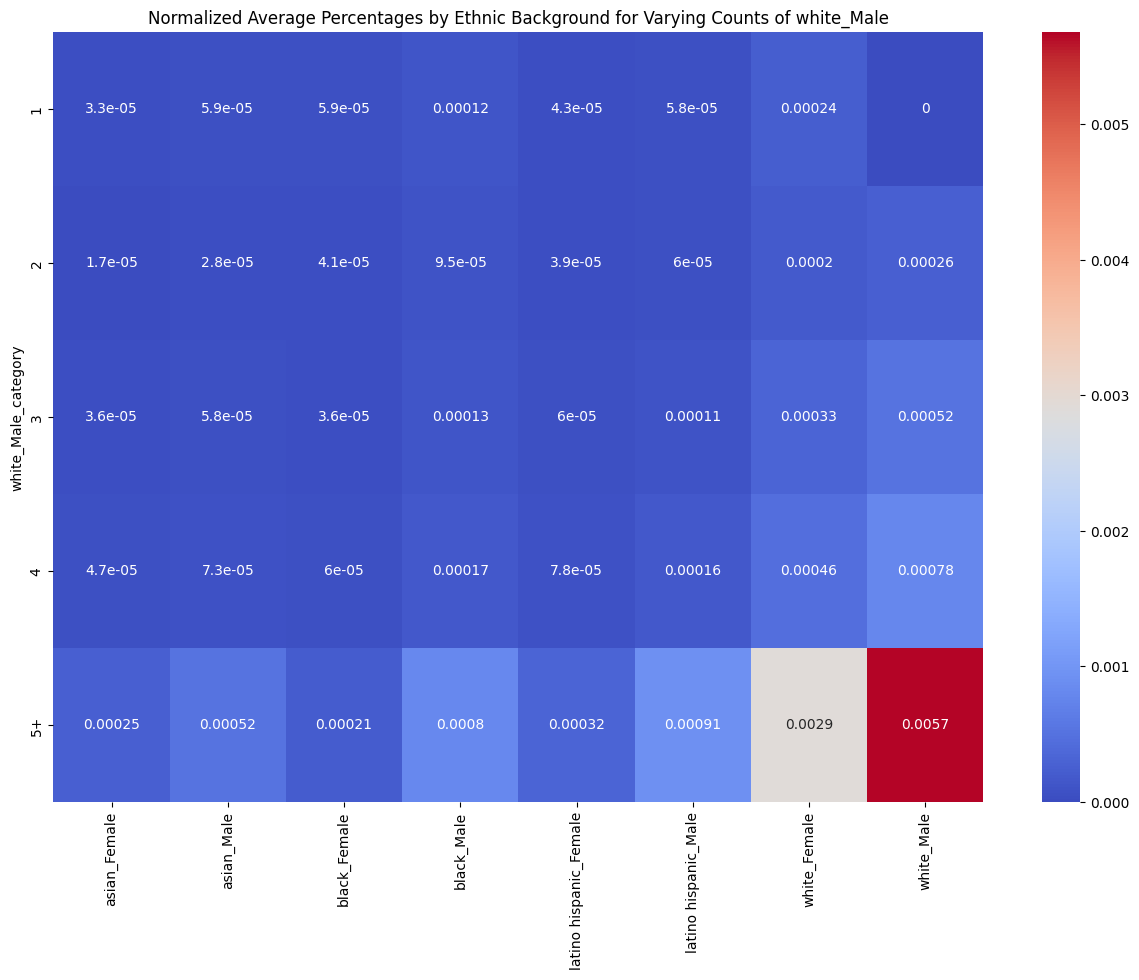

In [3]:
# Load the data
df = pd.read_csv(path)

# Filter out 'Undetermined', 'mexican', and 'middle eastern' columns
df = df.filter(regex='^(?!.*_Undetermined|.*indian|.*middle eastern).*$', axis=1)

# Drop columns that are not related to demographics (e.g., 'show_id', 'season_number')
demographics = df.drop(columns=['show_id', 'season_number'])

# Calculate the total sum of all demographics across the dataset
total_demographics_sum = demographics.sum().sum()

# Normalize the counts for each ethnic background by dividing by the total sum
normalized_demographics = demographics.div(total_demographics_sum) * 100

# Define the bins and labels for categorizing the demographic counts
bins = [0, 1, 2, 3, 4, np.inf]
labels = ['1', '2', '3', '4', '5+']

for demographic in normalized_demographics.columns:
    # Create a new column with the binned categories
    df[f'{demographic}_category'] = pd.cut(df[demographic], bins=bins, labels=labels, right=False)

    # Compute the mean for all other demographics
    average_counts = normalized_demographics.groupby(df[f'{demographic}_category']).mean()

    # Visualize the data
    plt.figure(figsize=(15, 10))
    sns.heatmap(average_counts, cmap='coolwarm', annot=True)
    plt.title(f'Normalized Average Percentages by Ethnic Background for Varying Counts of {demographic}')
    plt.show()


In [5]:
# Load the data
df = pd.read_csv(path)

# Filter out 'Undetermined', 'Indian', and 'Middle Eastern' columns
df = df.filter(regex='^(?!.*_Undetermined|.*indian|.*middle eastern).*$', axis=1)

# Drop columns that are not related to demographics (e.g., 'show_id', 'season_number')
demographics = df.drop(columns=['show_id', 'season_number'])

# Calculate the total sum of all demographics across the dataset
total_demographics_sum = demographics.sum().sum()

# Normalize the counts for each ethnic background by dividing by the total sum
normalized_demographics = demographics.div(total_demographics_sum) * 100

# Define the bins and labels for categorizing the demographic counts
bins = [0, 1, 2, 3, 4, 5, np.inf]
labels = ['0', '1', '2', '3', '4', '5+']

for demographic in normalized_demographics.columns:
    # Create a new column with the binned categories
    df[f'{demographic}_category'] = pd.cut(df[demographic], bins=bins, labels=labels, right=False)

    # Compute the mean for all other demographics
    average_counts = normalized_demographics.groupby(df[f'{demographic}_category']).mean()

    # Visualize the data
    plt.figure(figsize=(12, 7))
    sns.heatmap(average_counts, cmap='coolwarm', annot=True)
    plt.title(f'Normalized Average Percentages by Ethnic Background for Varying Counts of {demographic}')
    plt.show()

    # Print the count of TV seasons for each category
    counts = df[f'{demographic}_category'].value_counts(normalize=True) * 100
    for label in labels:
        print(f"For {demographic} count {label}, {counts.get(label, 0):.2f}% of the total TV seasons.")
    print("\n" + "="*50 + "\n")
